In [3]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
stocks = input("Enter the code of the stock:- ")
data = yf.download(stocks,"2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stock:-  NG=F


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [6]:
data.shape

(3282, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


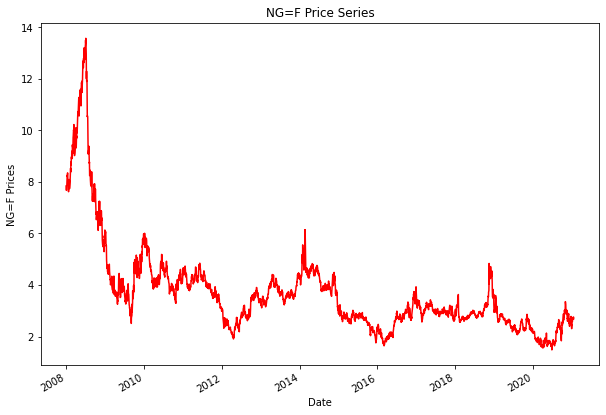

In [9]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18044\2693321050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<AxesSubplot: xlabel='Close', ylabel='Density'>

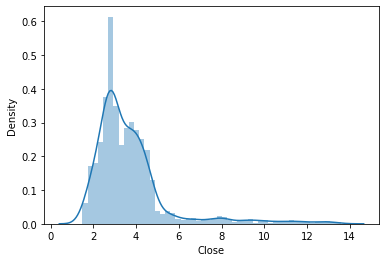

In [10]:
sns.distplot(data["Close"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18044\3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<AxesSubplot: xlabel='Open', ylabel='Density'>

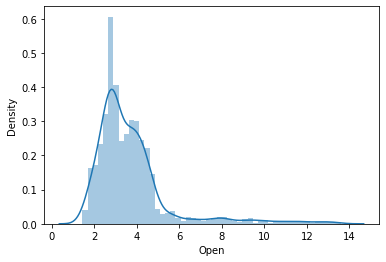

In [11]:
sns.distplot(data["Open"])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18044\3277148864.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<AxesSubplot: xlabel='High', ylabel='Density'>

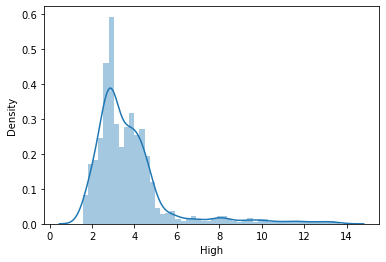

In [12]:
sns.distplot(data["High"])

In [13]:
X=data.drop("Close",axis=1)
y=data["Close"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [14]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2_scors=r2_score(y_test,y_pred)
    
    print("MSE:- ",mse)
    print("RMSE:- ",rmse)
    print("r2_score:- ",r2_scors)

calculate_metrics(y_test,pred1)

MSE:-  0.0015345662928876315
RMSE:-  0.03917354072441795
r2_score:-  0.9994383299702705


In [16]:
from sklearn.linear_model import Lasso, Ridge
la=Lasso().fit(X_train,y_train)
ri=Ridge().fit(X_train,y_train)

la_p=la.predict(X_test)
ri_p=ri.predict(X_test)

In [17]:
calculate_metrics(y_test,la_p)

MSE:-  0.2369233626053286
RMSE:-  0.48674774021594447
r2_score:-  0.9132831519010187


In [18]:
calculate_metrics(y_test,ri_p)

MSE:-  0.0016151026199614476
RMSE:-  0.040188339353118926
r2_score:-  0.9994088526896658


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr=SVR()

param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.3s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
svr=SVR(C=10,gamma=0.01,kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

In [22]:
import joblib
joblib.dump(ri,'model.pkl')
ridge_from_joblib=model=joblib.load("model.pkl")